## A4_3: Apply Multidimensional Scaling and interpret the results

Name : Aakash Kathirvel

VID : V01110153

Date : 07/08/2024

In [3]:
#Import Necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from google.colab import files

In [4]:
# Upload your dataset
uploaded = files.upload()

Saving icecream.csv to icecream.csv


In [5]:
# Load your dataset
df = pd.read_csv(next(iter(uploaded.keys())))

In [6]:
# Display the first few rows of the dataset
print(df.head())

     Brand  Price  Availability  Taste  Flavour  Consistency  Shelflife
0     Amul      4             5      4        3            4          3
1  Nandini      3             2      3        2            3          3
2  Vadilal      2             2      4        3            4          4
3   Vijaya      3             1      3        5            3          4
4    Dodla      3             3      3        4            4          3


In [7]:
# Summary statistics of the dataset
print(df.describe())

           Price  Availability      Taste    Flavour  Consistency  Shelflife
count  10.000000     10.000000  10.000000  10.000000    10.000000  10.000000
mean    3.000000      2.500000   3.500000   3.400000     3.500000   3.500000
std     0.816497      1.269296   0.849837   1.074968     0.527046   0.527046
min     2.000000      1.000000   2.000000   2.000000     3.000000   3.000000
25%     2.250000      2.000000   3.000000   3.000000     3.000000   3.000000
50%     3.000000      2.000000   3.500000   3.000000     3.500000   3.500000
75%     3.750000      3.000000   4.000000   4.000000     4.000000   4.000000
max     4.000000      5.000000   5.000000   5.000000     4.000000   4.000000


In [8]:
# Check for missing values
print("Total missing values:", df.isnull().sum().sum())

Total missing values: 0


In [9]:
# Display the dimensions and column names of the dataset
print("Dataset dimensions:", df.shape)
print("Column names:", df.columns)

Dataset dimensions: (10, 7)
Column names: Index(['Brand', 'Price', 'Availability', 'Taste', 'Flavour', 'Consistency',
       'Shelflife'],
      dtype='object')


In [13]:
# Drop the 'Brand' column and prepare the data for MDS
ice = df.drop(columns=['Brand'])
ice

,Price,Availability,Taste,Flavour,Consistency,Shelflife
0,4,5,4,3,4,3
1,3,2,3,2,3,3
2,2,2,4,3,4,4
3,3,1,3,5,3,4
4,3,3,3,4,4,3
5,2,2,4,4,3,4
6,2,3,4,3,4,4
7,4,1,2,3,3,3
8,3,4,5,5,4,4
9,4,2,3,2,3,3


In [12]:
# Compute the distance matrix
distance_matrix = pairwise_distances(ice, metric='euclidean')
distance_matrix

array([[0.        , 3.60555128, 3.74165739, 4.89897949, 2.64575131,
        4.        , 3.        , 4.58257569, 2.82842712, 3.46410162],
       [3.60555128, 0.        , 2.23606798, 3.31662479, 2.44948974,
        2.64575131, 2.44948974, 2.        , 4.35889894, 1.        ],
       [3.74165739, 2.23606798, 0.        , 2.82842712, 2.23606798,
        1.41421356, 1.        , 3.31662479, 3.16227766, 2.82842712],
       [4.89897949, 3.31662479, 2.82842712, 0.        , 2.64575131,
        2.        , 3.31662479, 2.64575131, 3.74165739, 3.46410162],
       [2.64575131, 2.44948974, 2.23606798, 2.64575131, 0.        ,
        2.23606798, 2.        , 2.82842712, 2.64575131, 2.64575131],
       [4.        , 2.64575131, 1.41421356, 2.        , 2.23606798,
        0.        , 1.73205081, 3.31662479, 2.82842712, 3.16227766],
       [3.        , 2.44948974, 1.        , 3.31662479, 2.        ,
        1.73205081, 0.        , 3.74165739, 2.64575131, 3.        ],
       [4.58257569, 2.        , 3.3166247

In [14]:
# Apply Multidimensional Scaling (MDS)
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=123)
mds_result = mds.fit_transform(distance_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [15]:
# Extract the MDS coordinates
x_coords = mds_result[:, 0]
y_coords = mds_result[:, 1]

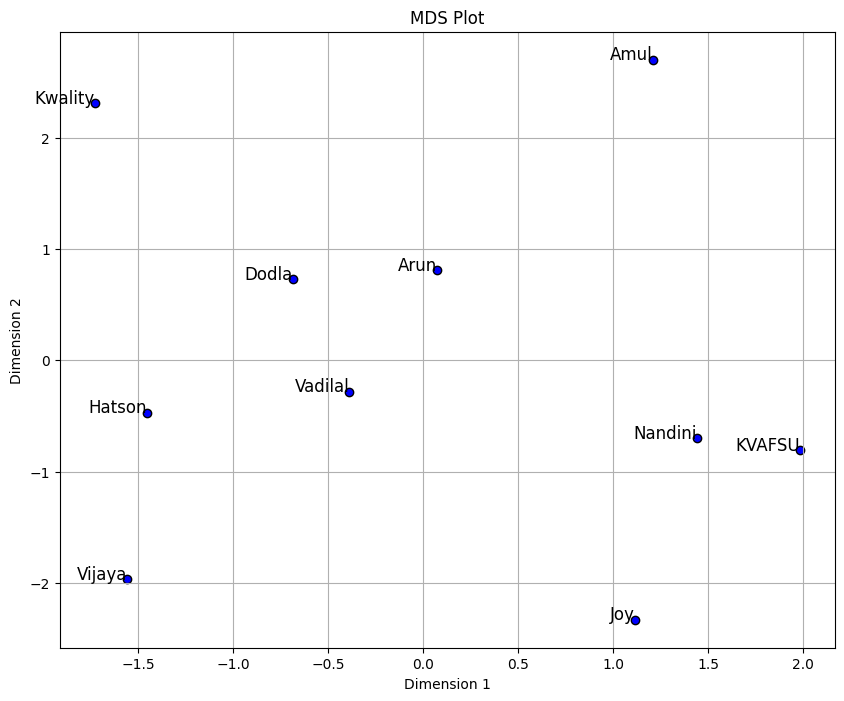

In [16]:
# Plot the MDS results
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, c='blue', marker='o', edgecolor='k')

# Annotate points with brand names
for i, brand in enumerate(df['Brand']):
    plt.text(x_coords[i], y_coords[i], brand, fontsize=12, ha='right')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('MDS Plot')
plt.grid(True)
plt.show()